# Project Data Science: Bitcoin Price Prediction

## 1. Introduction
In this day AI have a significant impact almost in our life and work place, and for this field we will leveraging ai in sequential data development. In this Data Science Project we will do some research about BTCUSD consolidation price with Deep Learning Neural Network LSTM method using PyTorch library
### 1. 1 Project Objective
The main objective is to predict BTC price until the next months with LSTM (Long Short Term Memory) method
### 1. 2 Dataset Description
`BTC-USD.csv` is the name of the dataset, which was taken from the Kaggle Dataset and has seven columns: `Date, Open,High, Low, Close, Adj Close, Volume`. The data is a compilation of the price of Bitcoin from 2014 until early 2024, which is a changes every minute. 

## 2. Data Preparation


### 2.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import root_mean_squared_error
from pycoingecko import CoinGeckoAPI
plt.style.use('ggplot')

### 2.2 Loading the Dataset

In [2]:
df = pd.read_csv('Dataset/BTC-USD.csv', parse_dates=['Date'])

### 2.3 Initial Data Exploration

In [3]:
# get 5 first data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
1,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
3,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0
4,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600.0


In [4]:
# get data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3413 entries, 0 to 3412
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3413 non-null   datetime64[ns]
 1   Open       3412 non-null   float64       
 2   High       3412 non-null   float64       
 3   Low        3412 non-null   float64       
 4   Close      3412 non-null   float64       
 5   Adj Close  3412 non-null   float64       
 6   Volume     3412 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 186.8 KB


In [5]:
# to know mean, max, min, std, 25%, 50%, 75% of each column
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3413,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3.412000e+03
mean,2019-05-21 00:00:00.000000256,14747.360368,15091.809098,14376.126435,14758.111980,14758.111980,1.663026e+10
min,2014-09-18 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2017-01-18 00:00:00,921.790009,935.210266,908.876495,921.739258,921.739258,1.685530e+08
50%,2019-05-21 00:00:00,8288.819824,8464.720703,8108.011475,8285.438965,8285.438965,1.176004e+10
75%,2021-09-20 00:00:00,24345.831543,24986.300293,23907.724610,24382.675293,24382.675293,2.697648e+10
max,2024-01-21 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16293.633702,16683.948248,15855.901350,16295.374063,16295.374063,1.907607e+10


## 3. Data Cleaning

### 3.1 Handling Missing Values

In [6]:
#find missing valuee
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [7]:
# drop all missing values
df.dropna(inplace=True)
# check again
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### 3.2 Removing Duplicate Values

In [8]:
# check duplicate values without Timestamp column
df.duplicated().sum()


np.int64(0)

## 4. Exploratory Data Analysis (EDA)

### 4.1 Descriptive Statistics

In [9]:
# descriptive statistics
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,3412,3412.000000,3412.000000,3412.000000,3412.000000,3412.000000,3.412000e+03
mean,2019-05-20 12:00:25.322391808,14747.360368,15091.809098,14376.126435,14758.111980,14758.111980,1.663026e+10
min,2014-09-18 00:00:00,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,2017-01-17 18:00:00,921.790009,935.210266,908.876495,921.739258,921.739258,1.685530e+08
50%,2019-05-20 12:00:00,8288.819824,8464.720703,8108.011475,8285.438965,8285.438965,1.176004e+10
75%,2021-09-19 06:00:00,24345.831543,24986.300293,23907.724610,24382.675293,24382.675293,2.697648e+10
max,2024-01-21 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,16293.633702,16683.948248,15855.901350,16295.374063,16295.374063,1.907607e+10


### 4.2 Correlation Analysis

In [10]:
# check the correlation between columns
df.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.768140,0.765571,0.772179,0.768385,0.768385,0.627426
Open,0.768140,1.000000,0.999497,0.999122,0.998831,0.998831,0.678427
High,0.765571,0.999497,1.000000,0.998970,0.999472,0.999472,0.683762
Low,0.772179,0.999122,0.998970,1.000000,0.999377,0.999377,0.668720
Close,0.768385,0.998831,0.999472,0.999377,1.000000,1.000000,0.677126
Adj Close,0.768385,0.998831,0.999472,0.999377,1.000000,1.000000,0.677126
Volume,0.627426,0.678427,0.683762,0.668720,0.677126,0.677126,1.000000


<Axes: >

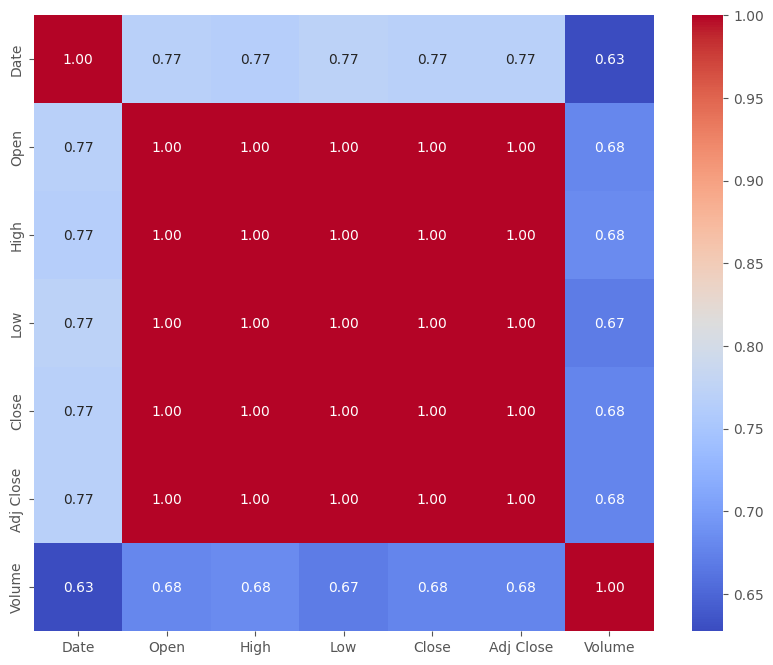

In [11]:
# plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

### 4.3 Data Visualization

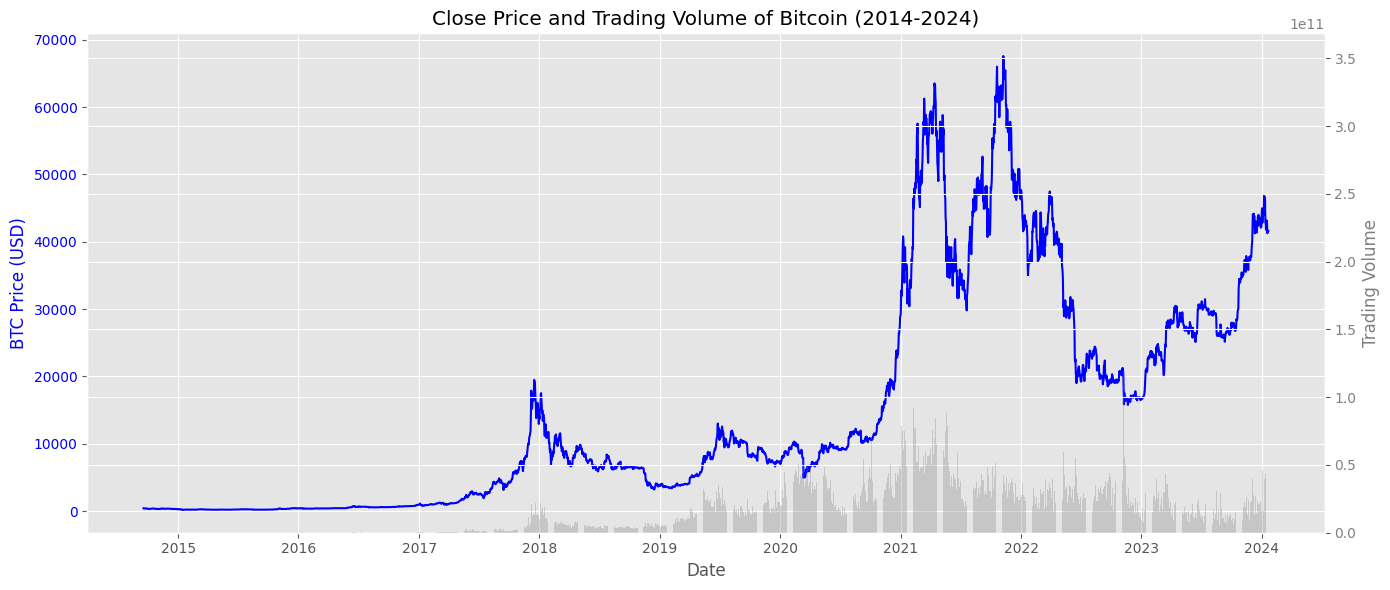

In [12]:
# visualize the closing price over time and volume
# make plot with 2 Y axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Close price in left side
ax1.plot(df['Date'], df['Close'], color='blue', label='Close Price')
ax1.set_xlabel('Date')
ax1.set_ylabel('BTC Price (USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# make second Y axis for volume
# Plot Volume in right side
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Volume'], color='gray', alpha=0.3, label='Volume')
ax2.set_ylabel('Trading Volume', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# Tambahkan judul dan legend
plt.title('Close Price and Trading Volume of Bitcoin (2014-2024)')
fig.tight_layout()
plt.show()

### 4.4 Distribution Analysis
- Close Price data is rigth skewed

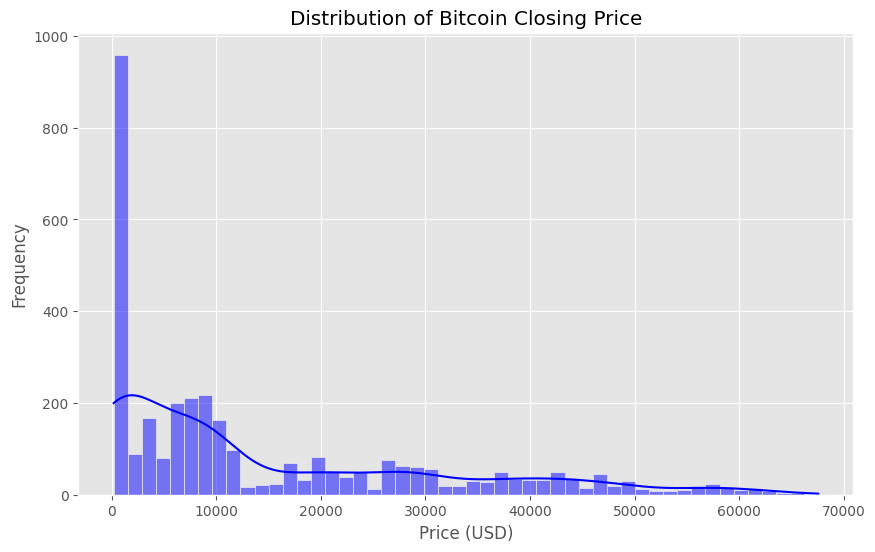

In [13]:
# distibution of the closing price
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='blue')
plt.title('Distribution of Bitcoin Closing Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()



## 5. Feature Engineering

In [14]:
# chech CUDA
torch.cuda.is_available()

True

### 5.1 Feature Selection

In [15]:
# make function for make sequence data xs and ys
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data.iloc[i:(i + seq_length), 4]
        y = data.iloc[i + seq_length, 4]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

# make sequence data with 30 days
X, y = create_sequences(df, 30)

# check the shape of X and y
X.shape, y.shape

((3382, 30), (3382,))

In [16]:
# check the first 5 data of X and y
X[:5], y[:5]

(array([[424.440002, 394.79599 , 408.903992, 398.821014, 402.152008,
         435.790985, 423.204987, 411.574005, 404.424988, 399.519989,
         377.181   , 375.46701 , 386.944   , 383.61499 , 375.071991,
         359.511993, 328.865997, 320.51001 , 330.07901 , 336.187012,
         352.940002, 365.026001, 361.562012, 362.299011, 378.549011,
         390.414001, 400.869995, 394.77301 , 382.556   , 383.757996],
        [394.79599 , 408.903992, 398.821014, 402.152008, 435.790985,
         423.204987, 411.574005, 404.424988, 399.519989, 377.181   ,
         375.46701 , 386.944   , 383.61499 , 375.071991, 359.511993,
         328.865997, 320.51001 , 330.07901 , 336.187012, 352.940002,
         365.026001, 361.562012, 362.299011, 378.549011, 390.414001,
         400.869995, 394.77301 , 382.556   , 383.757996, 391.441986],
        [408.903992, 398.821014, 402.152008, 435.790985, 423.204987,
         411.574005, 404.424988, 399.519989, 377.181   , 375.46701 ,
         386.944   , 383.61499 ,

In [17]:
# divide the dataset into train 80% and test
train_size = int(len(X) * 0.8)

# divide the dataset into train and test
X_train = X[:train_size]
X_test = X[train_size:]

y_train = y[:train_size]
y_test = y[train_size:]

# check the shape of X_train, X_test, y_train, y_test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2705, 30), (677, 30), (2705,), (677,))

### 5.2 Feature Transformation with MinMaxScaler

In [18]:
# MinMaxScaler
scaler_X = MinMaxScaler(feature_range=(-1, 1))
scaler_y = MinMaxScaler(feature_range=(-1, 1))

# fit the scaler to the data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))

In [19]:
# change to tensor
X_train_tensor = torch.tensor(X_train_scaled).float()
y_train_tensor = torch.tensor(y_train_scaled).float()
X_test_tensor = torch.tensor(X_test_scaled).float()
y_test_tensor = torch.tensor(y_test_scaled).float()

# check the shape of X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor
X_train_tensor.shape, y_train_tensor.shape, X_test_tensor.shape, y_test_tensor.shape

(torch.Size([2705, 30]),
 torch.Size([2705, 1]),
 torch.Size([677, 30]),
 torch.Size([677, 1]))

### 5.3 Make Dataset and Dataloader

In [20]:
# make train andt test dataset
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [21]:
# make dataloader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

## 6. Modelling using LSTM / GRU

In [22]:
# make class for LSTM
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x, num_layers, hidden_size):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size)
        c0 = torch.zeros(num_layers, x.size(0), hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

class GRU(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers):
        super().__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)
    
    def forward(self, x, num_layers, hidden_size):
        h0 = torch.zeros(num_layers, x.size(0), hidden_size) 
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

### 6.1 Model Training Loop

In [23]:
# make LSTM model with input size 1, hidden size 64, and num layers 2
lstm = LSTM(input_size=1, hidden_size=64, num_layers=2)
# make GRU model with input size 1, hidden size 64, and num layers 2
gru = GRU(input_size=1, hidden_size=64, num_layers=2)
# use MSE loss function and Adam optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.001)

# make training iteration
num_epochs = 100

for epoch in range(num_epochs):
    # for epoch in range(num_epochs):
    for seqs, labels in train_loader:
        # reshape the data
        seqs = seqs.view(seqs.size(0), seqs.size(1), 1)
        # make prediction
        y_pred = lstm(seqs, num_layers=2, hidden_size=64)
        # calculate the loss
        loss = criterion(y_pred, labels.view(-1, 1))
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.4f}')

Epoch 1/100, Loss: 0.8863
Epoch 1/100, Loss: 0.8166
Epoch 1/100, Loss: 0.7500
Epoch 1/100, Loss: 0.7476
Epoch 1/100, Loss: 0.7373
Epoch 1/100, Loss: 0.5893
Epoch 1/100, Loss: 0.5790
Epoch 1/100, Loss: 0.5175
Epoch 1/100, Loss: 0.5271
Epoch 1/100, Loss: 0.4083
Epoch 1/100, Loss: 0.4502
Epoch 1/100, Loss: 0.3968
Epoch 1/100, Loss: 0.3531
Epoch 1/100, Loss: 0.2785
Epoch 1/100, Loss: 0.2457
Epoch 1/100, Loss: 0.1444
Epoch 1/100, Loss: 0.0979
Epoch 1/100, Loss: 0.1295
Epoch 1/100, Loss: 0.2504
Epoch 1/100, Loss: 0.2572
Epoch 1/100, Loss: 0.1317
Epoch 1/100, Loss: 0.1326
Epoch 1/100, Loss: 0.1173
Epoch 1/100, Loss: 0.0924
Epoch 1/100, Loss: 0.0725
Epoch 1/100, Loss: 0.0912
Epoch 1/100, Loss: 0.0510
Epoch 1/100, Loss: 0.1432
Epoch 1/100, Loss: 0.1268
Epoch 1/100, Loss: 0.0831
Epoch 1/100, Loss: 0.1152
Epoch 1/100, Loss: 0.0741
Epoch 1/100, Loss: 0.0702
Epoch 1/100, Loss: 0.0531
Epoch 1/100, Loss: 0.0927
Epoch 1/100, Loss: 0.0465
Epoch 1/100, Loss: 0.0405
Epoch 1/100, Loss: 0.0498
Epoch 1/100,

### 6.2 Model Evaluation Loop

In [24]:
# mse = torchmetrics.MeanSquaredError()

# set the model to evaluation mode
lstm.eval()
# make prediction
with torch.no_grad():
    for seqs, labels in test_loader:
        seqs = seqs.view(seqs.size(0), seqs.size(1), 1)
        y_pred_log = lstm(seqs, num_layers=2, hidden_size=64)
        # invers log transformation
        y_pred = scaler_y.inverse_transform(y_pred_log.detach().cpu().numpy())
        y_true = scaler_y.inverse_transform(labels.view(-1, 1).cpu().numpy())
        rmse = root_mean_squared_error(y_pred, y_true)

#rmse = sklearn.sqrt(mse.nump)
print(f"Test RMSE: {rmse}")


Test RMSE: 1388.8043212890625


LSTM Test RMSE: 1118.783447265625  
GRU Test RMSE: 21445.294921875

Text(0.5, 1.0, 'True Price vs Predicted Price')

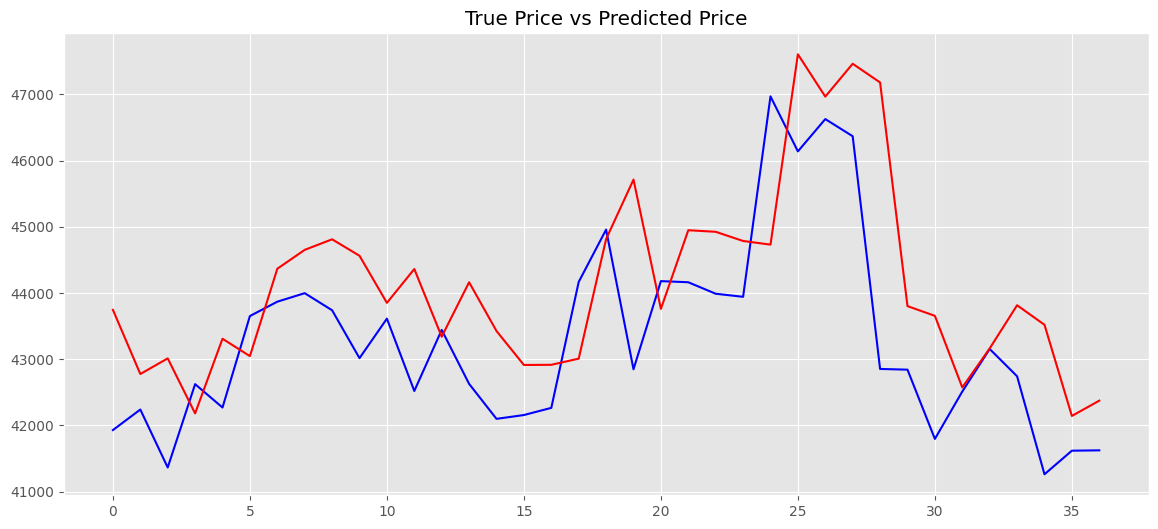

In [25]:
# plot y_pred and y_true
plt.figure(figsize=(14, 6))
plt.plot(y_true, label='True Price', color='blue')
plt.plot(y_pred, label='Predicted Price', color='red')
plt.title('True Price vs Predicted Price')

## 7. Prediction of Data

In [26]:
# make a function for prediction
def predict(model, input_seq, future_days, num_layers, hidden_size):
    # make model to be evaluation mode
    model.eval()
    preds = []
  
    input_seq = input_seq.view(-1, 1).clone().detach()

    for _ in range(future_days):
        # prepare input shape
        seq_input = input_seq[-60:].unsqueeze(0)

        # make prediction
        with torch.no_grad():
            y_pred_log = model(seq_input, num_layers, hidden_size)
            
        # save the prediction
        preds.append(y_pred_log.item())

        # update the input sequence with the prediction
        input_seq = torch.cat((input_seq, y_pred_log), dim=0)

    # invers log transformation
    #preds_tensor = torch.tensor(preds)
    #preds_tensor = torch.expm1(preds_tensor)

    preds_array = np.array(preds).reshape(-1, 1)
    preds_tensor = scaler_y.inverse_transform(preds_array)
    return preds_tensor

### 7.1 Predict from Existinc Data

In [27]:
# make prediction for 60 days ahead
last_seq = X_test_tensor[-60:]

predictions = predict(
    model=lstm,
    input_seq=last_seq,
    future_days=60,
    num_layers=2,
    hidden_size=64
)

In [28]:
# check the prediction shape
predictions.shape

(60, 1)

In [29]:
# get future TRUE data from csv
btc_future = pd.read_csv('Dataset/btc_future.csv', parse_dates=['Open time'])
btc_future = btc_future.rename(columns={'Open time': 'Date'})
btc_future = btc_future[(btc_future['Date'] >= '2024-01-21') & (btc_future['Date'] <= '2024-03-21')]

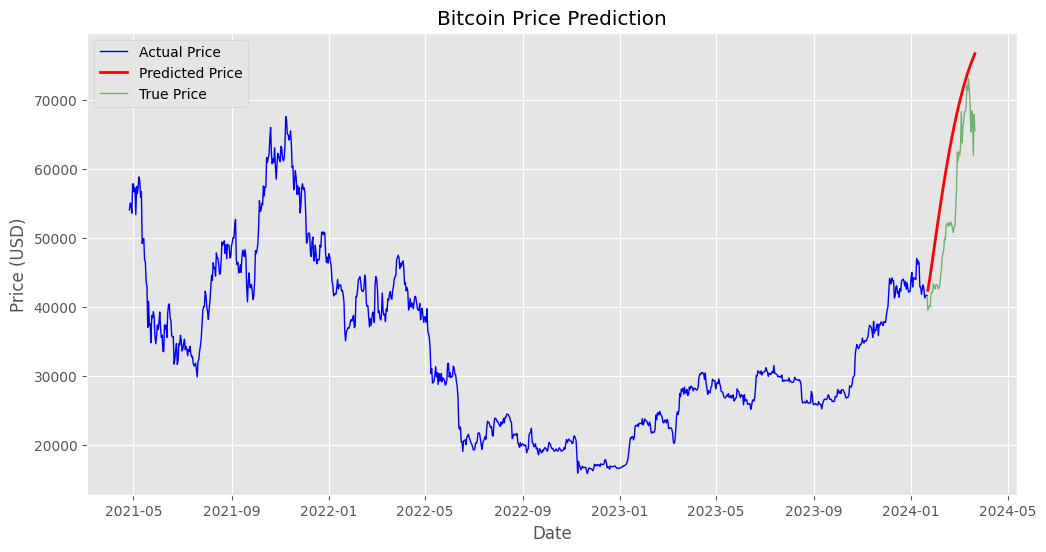

In [30]:
# visualize the prediction
plt.figure(figsize=(12, 6))
plt.plot(df['Date'].iloc[-1000:], df['Close'].iloc[-1000:], label='Actual Price', color='blue', linewidth=1)
plt.plot(pd.date_range(start=df['Date'].iloc[-1] + pd.Timedelta(days=1), periods=60), predictions, label='Predicted Price', color='red', linewidth=2)
plt.plot(btc_future['Date'], btc_future['Close'], label='True Price', color='green', linewidth=1, alpha=0.5)
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [31]:
# save the model
torch.save(lstm.state_dict(), 'lstm_model.pth')

### 7.2 Predict Recent Price from API Data (Optional)

In [32]:
# initialize the CoinGeckoAPI
cg = CoinGeckoAPI()
# get the data from CoinGecko API
data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=180)

In [33]:
# make dataframe from the data
prices_df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
prices_df['timestamp'] = pd.to_datetime(prices_df['timestamp'], unit='ms')

In [34]:
# make prices daily
daily_prices = prices_df.resample('D', on='timestamp').agg({'price': 'last'}).reset_index()
daily_prices.head()

,timestamp,price
0,2024-11-13,88264.599746
1,2024-11-14,90488.100075
2,2024-11-15,87407.512737
3,2024-11-16,90947.975094
4,2024-11-17,90606.454894


In [35]:
# change daily_price to numpy array
daily_prices_array = daily_prices['price'].values.reshape(-1, 1)

# scale the data
daily_prices_array = scaler_y.transform(daily_prices_array)
daily_prices_tensor = torch.tensor(daily_prices_array).float()

# check the shape of daily_prices_tensor
daily_prices_tensor.shape

# make prediction for 60 days ahead
predictions = predict(
    model=lstm,
    input_seq=daily_prices_tensor,
    future_days=30,
    num_layers=2,
    hidden_size=64
)

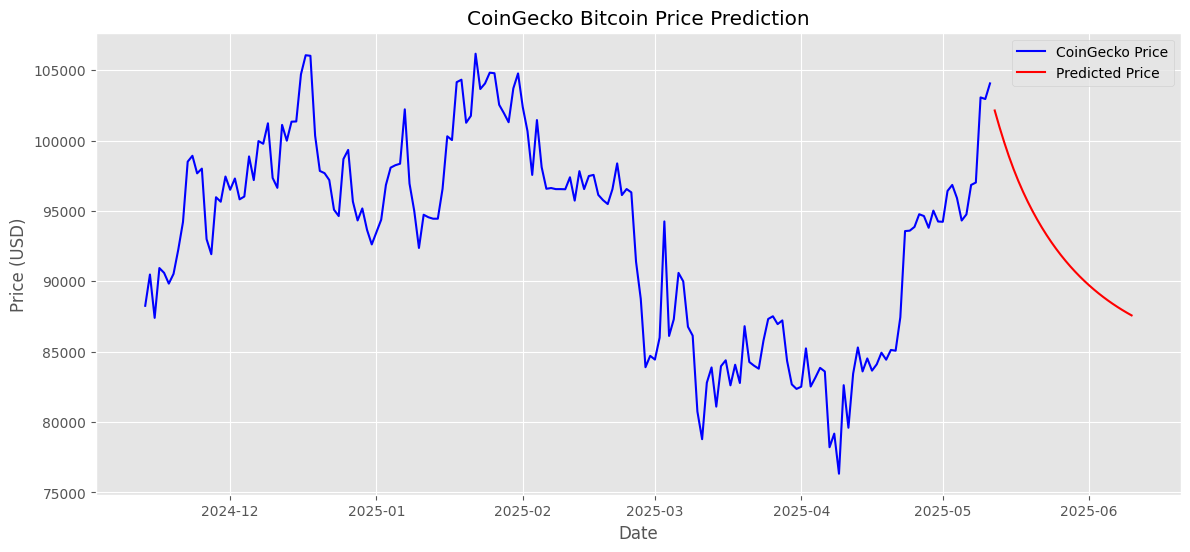

In [36]:
# visualize the prediction
plt.figure(figsize=(14, 6))
plt.plot(daily_prices['timestamp'], daily_prices['price'], label='CoinGecko Price', color='blue')
plt.plot(pd.date_range(start=daily_prices['timestamp'].iloc[-1] + pd.Timedelta(days=1), periods=30), predictions, label='Predicted Price', color='red')
plt.title('CoinGecko Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## 7. Interpretation and Conclusion

### 7.1 Interpretation of Result
The LSTM model applied to BTC/USD price data demonstrated strong performance. Using 3,382 daily BTC data points from September 18, 2014, to January 21, 2024, along with the application of various data transformation and normalization techniques, the model was able to produce predictions that closely matched actual values.

Evaluation using the Root Mean Squared Error (RMSE) metric showed an error margin of approximately 1,600 USD, which is considered low given the volatility of BTC prices. This indicates that the LSTM model effectively learned patterns from historical data with high accuracy.

### 7.2 Conclusions and recommendation

the Conclusion from visualization Actual vs predicted price data have accurate result with the spike of BTC price from 21-01-2024 forward make this model resulted as `reliable prediction model`. For the next step may this model will need some improvement with add extra feature or another hyperparameter tuning.
